# **AIPI 590 - XAI | Explainable Techniques II**
### Explainable Techniques II (PDP, ICE, ALE)


Author: Lindsay Gross


Dataset: Lifestyle and Sleep Patterns - Health Patterns in Sleep


License: CC0: Public Domain


Collaborators: Minahil Fatima (Owner)


Source: https://www.kaggle.com/datasets/minahilfatima12328/lifestyle-and-sleep-patterns?resource=download


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lindsaygross/explainable-techniques-II/blob/main/explainable-techniques-II.ipynb)




This notebook provides ...





In [5]:
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install PyALE


  Using cached numpy-1.25.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-hz678_8e/alepython_88db5c54ef1942df80b33b5ebb024f05
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-hz678_8e/alepython_88db5c54ef1942df80b33b5ebb024f05
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab67

# Run in Co-lab


In [6]:
# set up to run in google colab

import os

# check if running in google colab
try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
except ImportError:
    IN_COLAB = False

repo_name = "explainable-techniques-II"
git_path = "https://github.com/lindsaygross/explainable-techniques-II.git"

if IN_COLAB:
    print("Running in Google Colab...")

    # mount google drive
    drive.mount('/content/drive')

    # navigate to drive location
    drive_path = '/content/drive/MyDrive/Duke ME AIPI/Explainable AI'
    os.makedirs(drive_path, exist_ok=True)
    %cd "{drive_path}"

    # clone or update repo
    if not os.path.exists(repo_name):
        !git clone {git_path}
    else:
        %cd {repo_name}
        !git pull origin main
        %cd ..

    %cd {repo_name}

    # install dependencies
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        !pip install pandas numpy matplotlib seaborn scikit-learn PyALE


Running in Google Colab...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Duke ME AIPI/Explainable AI
/content/drive/MyDrive/Duke ME AIPI/Explainable AI/explainable-techniques-II
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
/content/drive/MyDrive/Duke ME AIPI/Explainable AI
/content/drive/MyDrive/Duke ME AIPI/Explainable AI/explainable-techniques-II


In [7]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


# Models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.inspection import PartialDependenceDisplay


# ALE
%pip install PyALE
from PyALE import ale


np.random.seed(1) # For reproducibility

# Don't run below code unless running through notebook

In [ ]:
# load data in notebooks
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv") #for notebook

## Dataset
We are using the **Lifestyle and Sleep Health dataset**, which contains 374 rows and 13 columns.  
The dataset includes demographic, lifestyle, and health-related features such as:

- **Demographics:** Gender, Age, Occupation  
- **Lifestyle factors:** Sleep Duration, Physical Activity Level, Daily Steps  
- **Health indicators:** Stress Level, BMI Category, Blood Pressure, Heart Rate  
- **Targets/outcomes:** Quality of Sleep (numeric), Sleep Disorder (categorical)  

For modeling, we focus on **Quality of Sleep** as the target variable.


# Don't run below code unless running through Co-lab

In [8]:
# Load Data

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# full path to your dataset in Google Drive
file_path = "/content/drive/MyDrive/Duke ME AIPI/Explainable AI/Sleep_health_and_lifestyle_dataset.csv"

# load the dataset
df = pd.read_csv(file_path) # for co-lab

# quick check
print(df.shape)
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
# Show first 5 rows
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
# Info about columns & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
# get null values
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [12]:
# Clean data

# Drop ID column (not useful for modeling)
if "Person ID" in df.columns:
    df = df.drop(columns=["Person ID"])

# Convert Blood Pressure into usable numeric format
if "Blood Pressure" in df.columns:
    bp_split = df["Blood Pressure"].str.split("/", expand=True)
    df["Systolic_BP"] = pd.to_numeric(bp_split[0], errors="coerce")
    df["Diastolic_BP"] = pd.to_numeric(bp_split[1], errors="coerce")
    df = df.drop(columns=["Blood Pressure"])

# Check
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           155 non-null    object 
 11  Systolic_BP              374 non-null    int64  
 12  Diastolic_BP             374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB
None
  Gender  Age    

## Data Cleaning
- Dropped the `Person ID` column (not useful for modeling).  
- Split `Blood Pressure` into **Systolic_BP** and **Diastolic_BP** for numeric analysis because orginally stored as a string.
- Encoded categorical variables (`Gender`, `Occupation`, `BMI Category`, `Sleep Disorder`) using label encoding.  
- Used `.info()` and `.head()` to confirm the dataset updates worked correctly.  

This step is important because models require numeric inputs, and transforming `Blood Pressure` into numeric values makes it usable for correlation analysis and feature importance to avoid noise or errors.





In [13]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Copy dataset to keep a clean version
df_model = df.copy()

# Identify categorical columns
cat_cols = df_model.select_dtypes(include=["object"]).columns
print("Categorical columns:", cat_cols)

# Encode each categorical column
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    encoders[col] = le
# Used ChatGPT5 at 1:00pm on 9/28/25 to help with the above code block, specifically the line "df_model[col] = le.fit_transform(df_model[col])"

print(df_model.info())
print(df_model.head())


Categorical columns: Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic_BP              374 non-null    int64  
 12  Diastolic_BP             374 no

## Encoding Categorical Variables

The dataset has several categorical features: **Gender, Occupation, BMI Category, and Sleep Disorder**.  
To prepare the data for modeling, these variables were encoded into numeric form using `LabelEncoder`.  

- Each category is now represented as an integer (e.g., Male = 1, Female = 0).  
- Ensures that all features are numeric.
- The dataset now has 13 numeric columns and ready for model training.


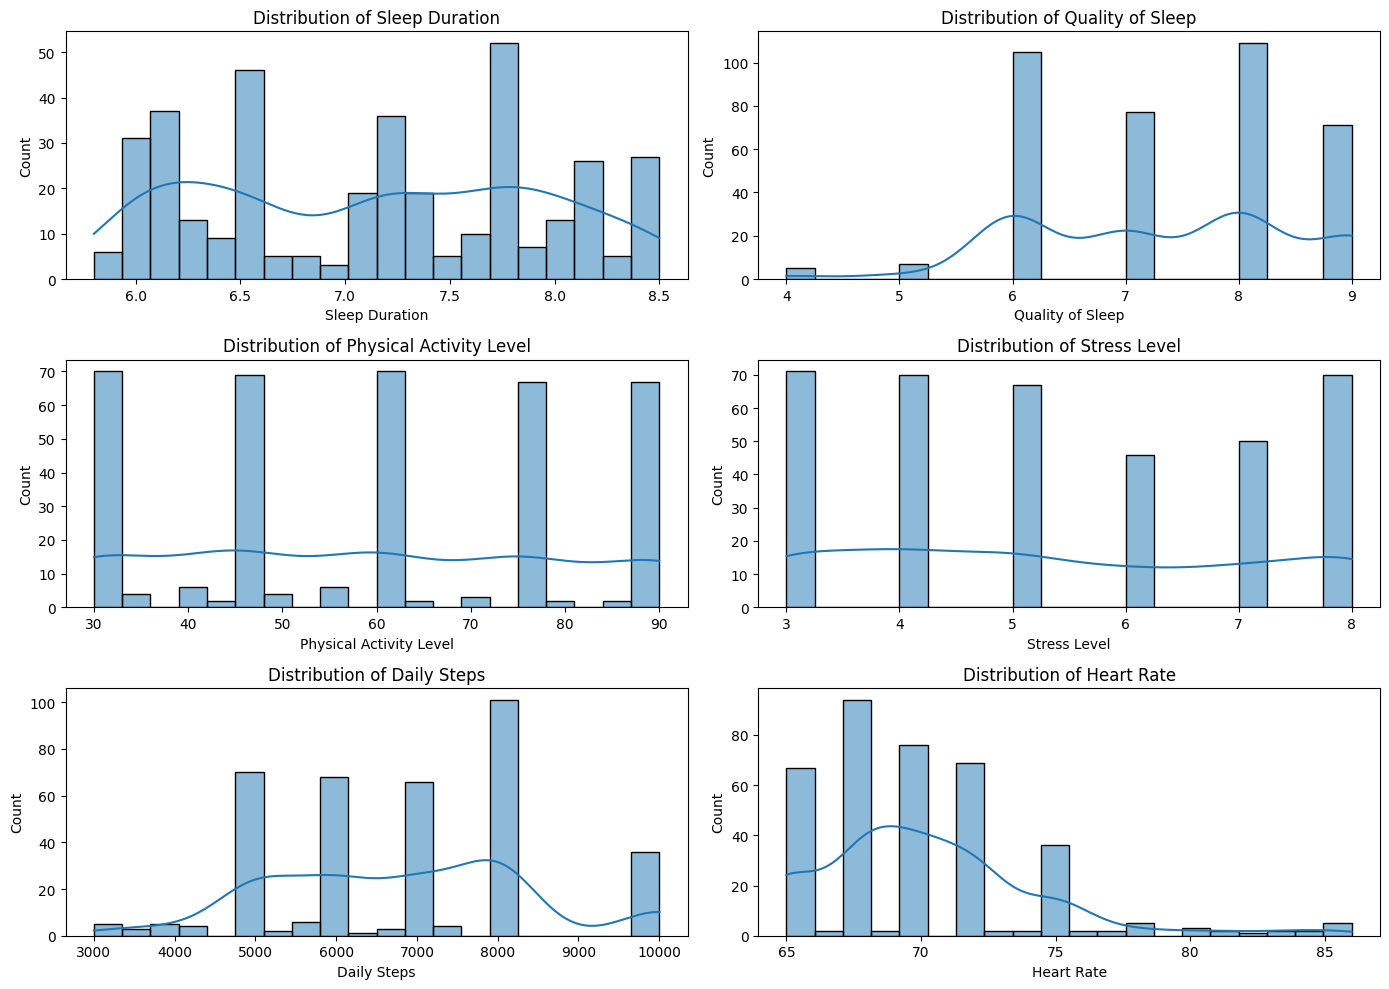

In [14]:
# Exploratory Data Analysis

# Summary statistics
df.describe()

# Distribution plots for key numerical features
num_features = ["Sleep Duration", "Quality of Sleep",
                "Physical Activity Level", "Stress Level",
                "Daily Steps", "Heart Rate"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()
# Used ChatGPT5 at 1:05pm on 9/28/25 to help with the above code block, specifically the line "sns.histplot(df[col], kde=True, bins=20)"


## Exploratory Data Analysis (EDA)

We began with a descriptive analysis of the key numerical features in the dataset.  

- **Sleep Duration**: Most values are between **6–8 hours**, with a high around 7 hours.  
- **Quality of Sleep**: Concentrated between **6–8**, suggesting **moderate to good** sleep quality for most individuals.  
- **Physical Activity Level**: Shows variation across the population, with clusters at mid to high activity levels.  
- **Stress Level**: Generally ranges from 3–8, with most people reporting **moderate stress**.  
- **Daily Steps**: Peaks around 5,000–8,000 steps, with few very active individuals reaching 10,000.  
- **Heart Rate**: Centered around 65–75 bpm, with fewer individuals above 80.  

These distributions provide a baseline understanding of lifestyle and health indicators in the dataset that will help with further correlation and model-based analysis using Explainable Techniques.


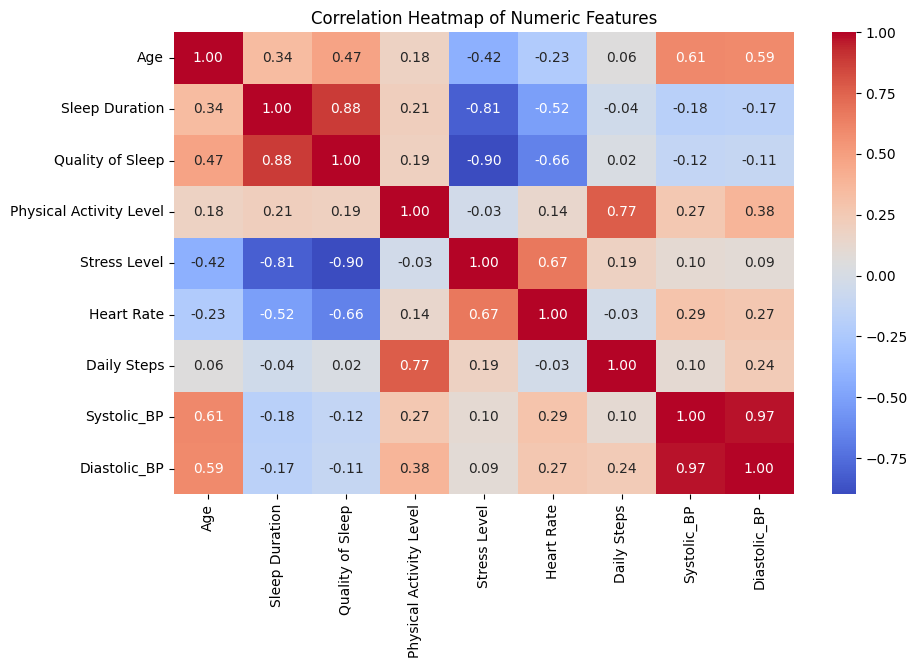

In [15]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Referenced machine_learning_court.ipynb to help with the above code block

## Correlation Analysis (IDP vs ALE)

The correlation heatmap shows the following important relationships between features:

- **Sleep Duration & Quality of Sleep**: Strong positive correlation (~0.88), suggesting longer sleep is associated with better quality.  
- **Stress Level & Quality of Sleep**: Strong negative correlation (~-0.90), indicating higher stress reduces sleep quality.  
- **Stress Level & Sleep Duration**: Negative correlation (~-0.81), showing stressed individuals tend to sleep less.  
- **Daily Steps & Physical Activity Level**: Positive correlation (~0.77), as expected since both measure activity.  
- **Age & Blood Pressure (Systolic/Diastolic)**: Moderate positive correlations, aligning with known health trends.  

These results show that when features are correlated, PDP plots can be a little misleading. This is why ALE plots are helpful since they adjust for those dependencies and give a clearer picture. ALE helps adjust for this by focusing on changes within intervals, so its results are less distorted by correlation.  


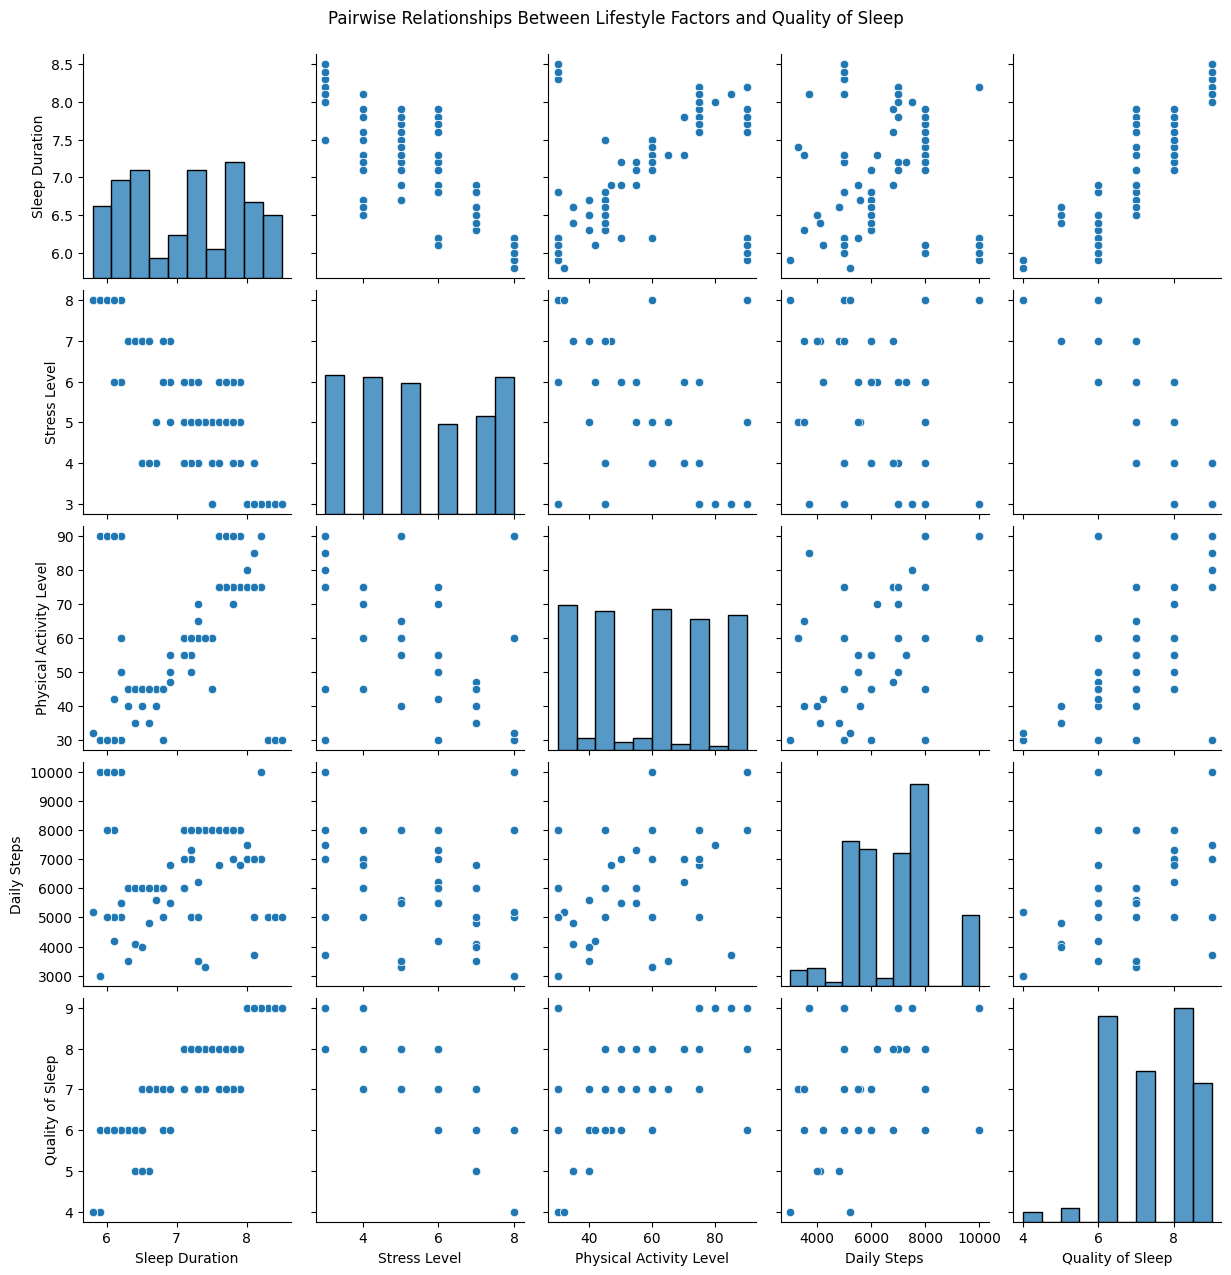

In [16]:

# Pairwise scatterplots for selected features vs Quality of Sleep
num_cols_for_pairplot = ["Sleep Duration", "Stress Level",
                         "Physical Activity Level", "Daily Steps",
                         "Quality of Sleep"]

sns.pairplot(df[num_cols_for_pairplot], diag_kind="hist") # Used ChatGPT5 at 1:10pm on 9/28/25 to help with diag_kind="hist"
plt.suptitle("Pairwise Relationships Between Lifestyle Factors and Quality of Sleep", y=1.02)
plt.show()

## Feature Relationships

The pairplot shows the relationships between key lifestyle factors and **Quality of Sleep**:

- **Sleep Duration vs Quality of Sleep**: Clear positive trend — individuals who sleep longer tend to report higher quality.  
- **Stress Level vs Quality of Sleep**: Strong negative trend — higher stress is associated with poorer sleep quality.  
- **Physical Activity vs Daily Steps**: Positive correlation - confirming both capture related aspects of activity.  
- **Activity/Steps vs Quality of Sleep**: Weak to moderate positive relationships - suggesting more active individuals may have better sleep.  

These scatterplots reinforce the correlation findings from the heatmap and show how lifestyle factors interact with sleep outcomes.

In [17]:
# Model Training and Evaluation

# Define target and features
target = "Quality of Sleep"
X = df_model.drop(columns=[target])
y = df_model[target]

#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model using Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}") # Lower RMSE means better fit
print(f"R²: {r2:.2f}") # R² close to 1 means a good fit


RMSE: 0.13
R²: 0.99


## Model Training and Evaluation

We trained a **Random Forest Regressor** using 80/20 train-test split, with **Quality of Sleep** as the target variable.  

- The model achieved **RMSE = 0.13** and **R² = 0.99**, indicating very strong predictive performance.  
- Used Random Forest because it can handle non-linear relationships and interactions between features which are important for lifestyle and health data.  


## Partial Dependence Plots (PDP)

A Partial Dependence Plot shows the marginal effect one or two features have on the predicted outcome of a model.

**How it Works:**
1. Select feature of interest
2. For every instance in training dataset:
*  Keep all other features the same, create variants of the instance by replacing the feature’s value with values from a grid
*  Make predictions with the black box model for newly created instances so that there is a set of points for an instance with the feature value from the grid and the respective predictions
3. Average across all instances and plot



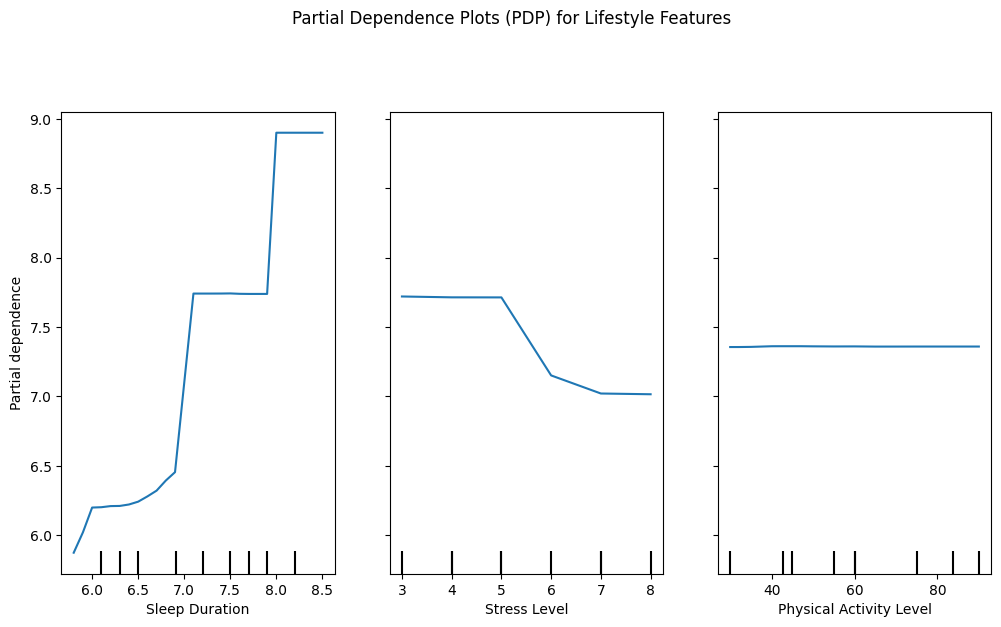

In [18]:
# Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots

# Pick features to analyze
features_to_plot = ["Sleep Duration", "Stress Level", "Physical Activity Level"]

# PDP (Partial Dependence Plots)
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    model, X_train, features_to_plot, kind="average", ax=ax
)
# Referenced global_explanations.ipynb to help with the above code block

plt.suptitle("Partial Dependence Plots (PDP) for Lifestyle Features", y=1.05)
plt.show()

## Interpretation of Partial Dependence Plots (PDP)

The PDP plots show how each lifestyle feature relates to the model’s predictions:

- **Sleep Duration**: As sleep duration increases, the predicted outcome generally goes up. The increase around 7.5–8 hours suggests the model thinks longer sleep has a strong positive effect.  
- **Stress Level**: Higher stress levels are linked to lower predicted outcomes. The biggest drop happens between stress levels 5–6, meaning stress has a significant role.  
- **Physical Activity Level**: The line is flat indicating the model doesn’t see much of a relationship between physical activity and the outcome.  

Overall, the model seems most sensitive to **sleep and stress**, and not senstive to physical activity.  


# Individual Conditional Expectation (ICE)

An Individual Conditional Expectation (ICE) plot shows how the predicted outcome of a model changes with a feature **for each individual instance** in the dataset.

**How it Works:**
1. Select feature of interest  
2. For a single instance in the training dataset:  
   * Keep all other features fixed  
   * Replace the feature’s value with values from a grid  
   * Make predictions with the model to see how the outcome changes for that instance  
3. Repeat this process for all instances in the dataset and plot each line separately  
4. The result is a collection of curves, one per instance, showing the individualized relationship between the feature and the prediction  



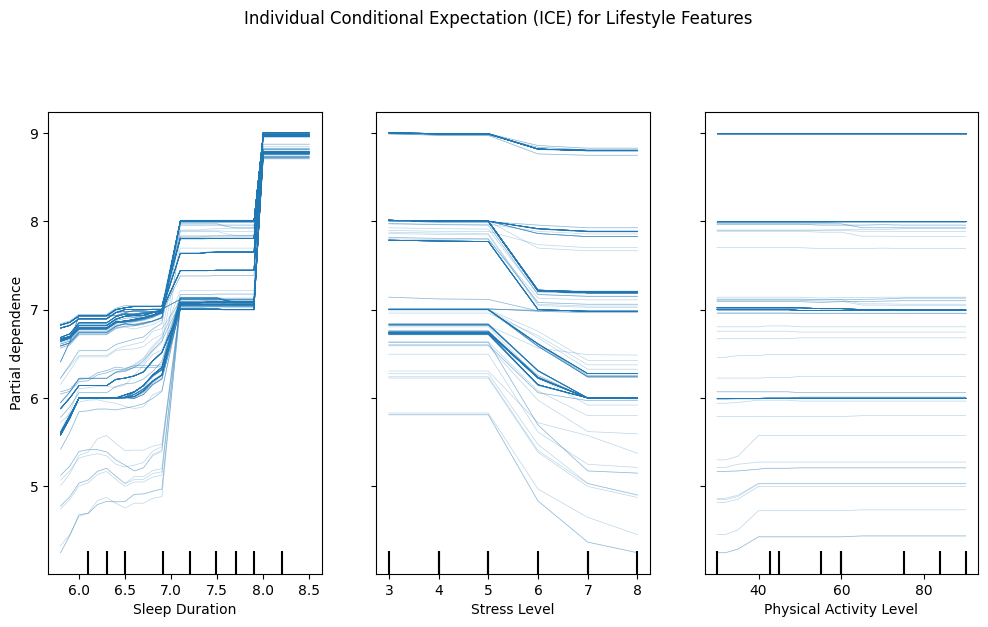

In [19]:
# ICE (Individual Conditional Expectation)
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator( # Used ChatGPT5 at 1:20pm on 9/28/25 to ensure correct use of PartialDependenceDisplay
    model, X_train, features_to_plot, kind="individual", ax=ax
)
plt.suptitle("Individual Conditional Expectation (ICE) for Lifestyle Features", y=1.05)
plt.show()

## Interpretation of Individual Conditional Expectation (ICE)

The ICE plots show how each individual data point responds to changes in the lifestyle features:

- **Sleep Duration**: Most lines go up as sleep duration increases, which means more sleep usually leads to higher predicted outcomes. The spread between lines shows that the effect isn’t the same for everyone; some people benefit more from sleep than others.  
- **Stress Level**: The lines mostly have a downwards slope, meaning that higher stress typically lowers the predictions. The different positions of the lines show variation across individuals, but the overall trend is still negative.  
- **Physical Activity Level**: The lines are basically flat, suggesting physical activity doesn’t change the prediction much.

Overall, ICE clearly shows that sleep and stress have strong, but varied effects depending on the person, while physical activity doesn’t have a large effect on the model.  


# Accumulated Local Effects (ALE)

An Accumulated Local Effects (ALE) plot shows how a feature influences the predicted outcome of a model. Unlike PDP, ALE avoids the assumption that features are independent. ALE is less biased when features are correlated.

**How it Works:**
1. Select feature of interest  
2. Divide the feature’s values into intervals (bins)  
3. For each interval:  
   * Calculate how much the model prediction changes when the feature moves within that interval, keeping all other features fixed  
   * Average these local changes across all instances that fall into the interval  
4. Accumulate these average effects over the intervals and center them around zero  
5. Plot the accumulated effects to show how the feature impacts predictions across its range  


INFO:PyALE._ALE_generic:Continuous feature detected.
INFO:PyALE._ALE_generic:Discrete feature detected.
INFO:PyALE._ALE_generic:Continuous feature detected.


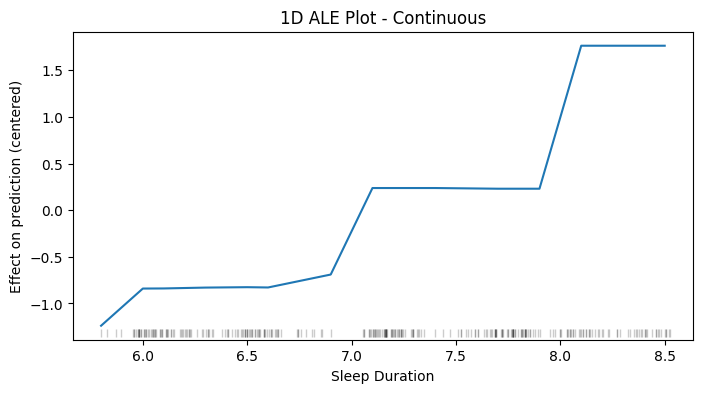

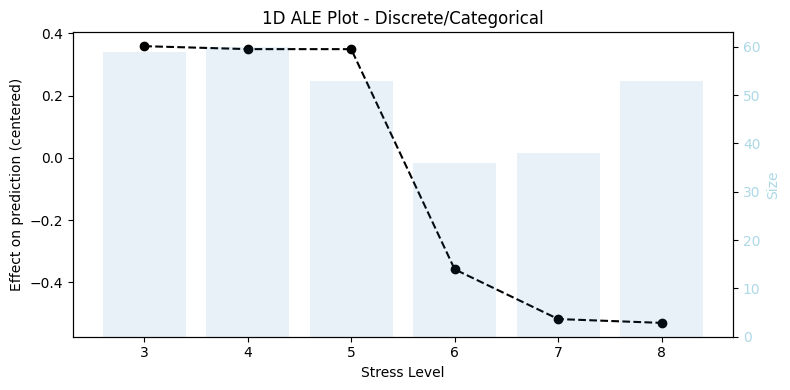

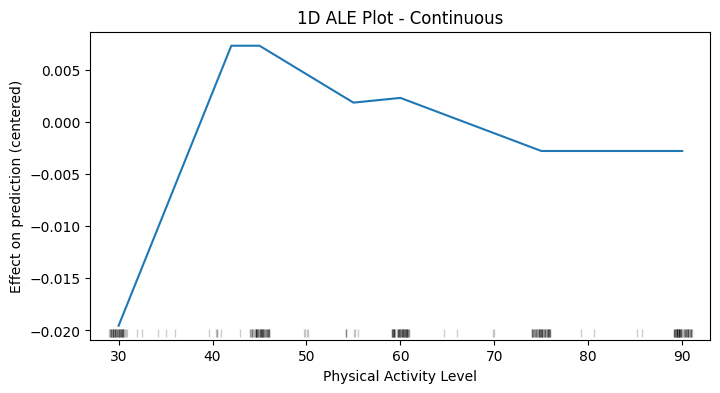

In [20]:
# Used ChatGPT5 at 1:20pm on 9/28/25 to help with format for below code blocks

# ALE for Sleep Duration
ale_plot1 = ale(
    X=X_train, model=model, feature=["Sleep Duration"],
    grid_size=20, include_CI=False
)

# ALE for Stress Level
ale_plot2 = ale(
    X=X_train, model=model, feature=["Stress Level"],
    grid_size=20, include_CI=False
)

# ALE for Physical Activity Level
ale_plot3 = ale(
    X=X_train, model=model, feature=["Physical Activity Level"],
    grid_size=20, include_CI=False
)


## Interpretation of Accumulated Local Effects (ALE)

The ALE plots show how each feature locally affects the model’s predictions while taking correlations into account:

- **Sleep Duration**: The effect increases as sleep goes up. Around 7.5–8 hours, the jump is especially strong, meaning the model predicts longer sleep has a clear positive influence.  
- **Stress Level**: The plot shows a drop after stress levels of about 5–6, which reinforces the finding that high stress hurts the prediction. Lower stress levels stay more stable.  
- **Physical Activity Level**: The effect is almost flat, besides the bump around 40–50 physical activity level, and then it settles back down. This suggests activity doesn’t move the prediction much.  

Overall, ALE confirms that sleep and stress matter the most, while physical activity doesn’t play a big role in the model.  


## PDP vs ALE Comparison

When comparing the PDP and ALE plots, the overall trends are similar for **Sleep Duration** and **Stress Level**. Both methods show that longer sleep has a positive effect, while higher stress lowers the outcome.  

The main difference is that PDP can sometimes exaggerate the relationship if features are correlated, because it averages over all instances without accounting for feature dependencies. ALE looks at local effects within intervals of the feature, which makes it less biased. For example, in the **Stress Level** plots, PDP suggested a sharp drop, but ALE smoothed this out and showed a more gradual decline, which is likely a more realistic effect.  

---

## Takeaways

Each Explainable techniques adds a unique insight:  

- **PDP** shows the average global trend across all individuals.  
- **ICE** highlights the variation between individuals, showing that not everyone responds to lifestyle factors the same way.  
- **ALE** shows a more reliable picture when features are correlated, since it avoids the independence assumption that PDP makes.  

Across all three techniques, we can conclude that **Sleep Duration and Stress Level are the most important lifestyle factors influencing the model’s predictions**, while **Physical Activity Level has little effect**. PDP and ICE helped show the strength and variation of these effects, and ALE confirmed that the results are not just distortions of correlation.  